In [6]:
!pip install pydicom

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pydicom

In [8]:
path0 = 'your data path'


### JPEG 파일 불러오기

In [9]:
I = Image.open(path0+'IMG_0926.jpeg')
print(I.format, I.size, I.mode)
f = np.array(I)

JPEG (4032, 3024) RGB


In [10]:
from PIL.ExifTags import TAGS
exifdata = I.getexif()
cn = 0
for tag_id in exifdata:
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    print(f"{tag:25}: {data}")
    cn = cn + 1
#    if cn > 30:
#        break

ExifVersion              : b'0232'
ComponentsConfiguration  : b'\x01\x02\x03\x00'
ShutterSpeedValue        : (58080, 5977)
DateTimeOriginal         : 2021:03:30 17:39:34
DateTimeDigitized        : 2021:03:30 17:39:34
ApertureValue            : (54823, 32325)
BrightnessValue          : (83488, 9781)
ExposureBiasValue        : (0, 1)
MeteringMode             : 5
Flash                    : 16
FocalLength              : (399, 100)
ColorSpace               : 65535
ExifImageWidth           : 4032
FocalLengthIn35mmFilm    : 28
SceneCaptureType         : 0
Make                     : Apple
Model                    : iPhone 8
                    36880: +09:00
Orientation              : 1
YCbCrPositioning         : 1
                    36881: +09:00
                    36882: +09:00
SubsecTimeOriginal       : 475
SubjectLocation          : (2015, 1511, 2217, 1330)
SubsecTimeDigitized      : 475
ExifImageHeight          : 3024
XResolution              : (72, 1)
YResolution              : (72, 1)


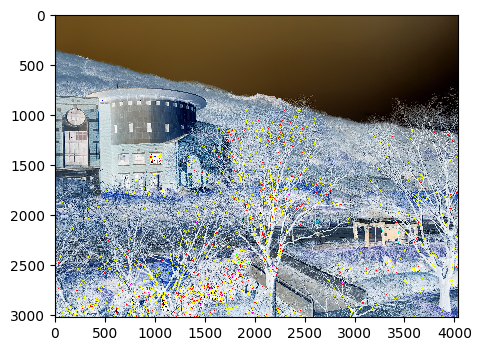

In [11]:
plt.figure(dpi=100)
plt.imshow(f-2*f)
plt.show()

### Dicom파일 불러오기
- Dicom은 대표적인 의료영상데이터에 대한 파일포맷으로 대부분의 의료영상이 dicom포맷으로 저장 및 소비되고 있다.
- Dicom은 jpg, png 등과 같은 일반적인 영상파일포맷과 비교했을 때 보다 의료에 특화되어 있는 metadata를 표준화된 형태로 함께 저장할 수 있도록 되어 있다.
- 따라서, dicom을 통하여 영상데이터 뿐만 아니라 해당영상과 연관되어 있는 다양한 정보들에 함께 접근할 수 있다. 
- 병원내부에서 유통되는 dicom의 metadata에는 환자나 의료기관의 민감한 정보가 포함될 수 있으므로 취급에 주의가 필요하다.

In [12]:
dcm = pydicom.dcmread(path0+'MRI.dcm')

In [13]:
print("modality:",dcm.Modality)
print("hospital:",dcm.InstitutionName)
print("voxelsize:",dcm.PixelSpacing)
print("slice thickness:",dcm.SliceThickness)

modality: MR
hospital: HUFS hospital
voxelsize: [1.200003, 1.200003]
slice thickness: 1.054690


In [14]:
f = dcm.pixel_array
print(f.shape)
print("Lmin : ",np.min(f))
print("Lmax : ",np.max(f))

(210, 176)
Lmin :  0
Lmax :  945


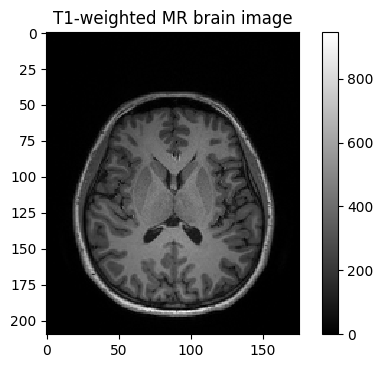

In [15]:
plt.figure(dpi=100)
plt.imshow(f,vmin=np.min(f),vmax=np.max(f),cmap='gray')
plt.colorbar()
#plt.axis('off')
plt.title('T1-weighted MR brain image')
plt.show()

### Representating Digital Images

In [16]:
I = Image.open(path0+'rose.tif')
print(I.format, I.size, I.mode)
IM = np.array(I)

TIFF (1600, 1754) L


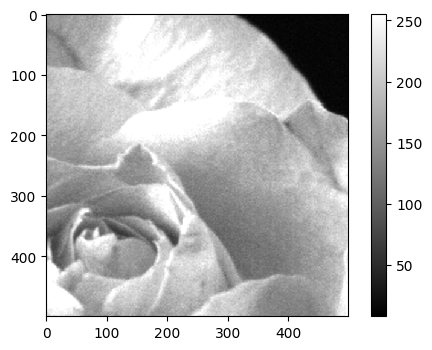

In [17]:
plt.figure(dpi=100)
plt.imshow(IM[200:700,800:1300], cmap = 'gray',interpolation='nearest')
#plt.axis('off')
plt.colorbar()
plt.show()

In [18]:
dcm = pydicom.dcmread(path0+'CT.dcm')
print("RescaleIntercept:",dcm.RescaleIntercept)
print("RescaleSlope:",dcm.RescaleSlope)
f =dcm.RescaleSlope*dcm.pixel_array + dcm.RescaleIntercept
print(f.shape)

RescaleIntercept: -1024
RescaleSlope: 1
(512, 512)


In [19]:
print("Lmin : ",np.min(f))
print("Lmax : ",np.max(f))

Lmin :  -3024.0
Lmax :  1727.0


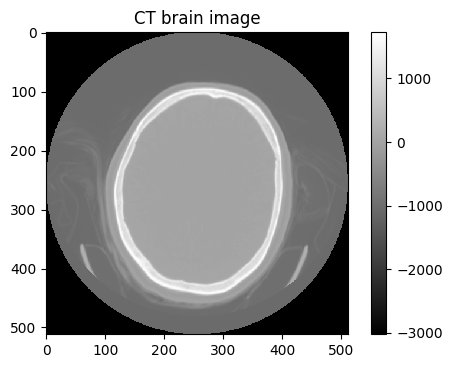

In [20]:
plt.figure(dpi=100)
plt.imshow(f,vmin=np.min(f),vmax=np.max(f),cmap='gray')
plt.colorbar()
#plt.axis('off')
plt.title('CT brain image')
plt.show()

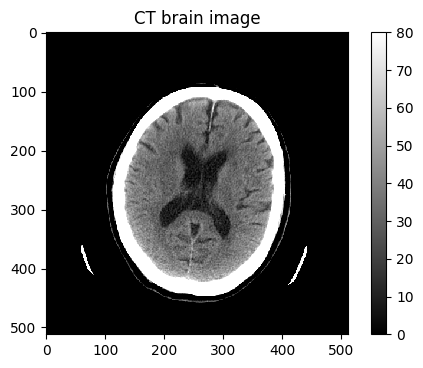

In [21]:
plt.figure(dpi=100)
plt.imshow(f,vmin=0,vmax=80,cmap='gray')
plt.colorbar()
#plt.axis('off')
plt.title('CT brain image')
plt.show()

### Spatial Resolution

In [22]:
I = Image.open(path0+'Chronometer.tif')

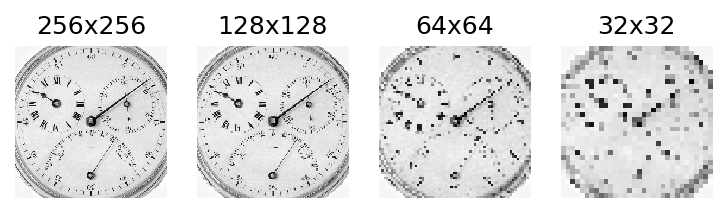

In [23]:
plt.figure(dpi=150)
plt.subplot(1,4,1)
plt.imshow(I.resize((256,256)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('256x256')
plt.subplot(1,4,2)
plt.imshow(I.resize((128,128)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('128x128')
plt.subplot(1,4,3)
plt.imshow(I.resize((64,64)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('64x64')
plt.subplot(1,4,4)
plt.imshow(I.resize((32,32)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('32x32')
plt.show()

### Image Interpolation

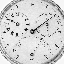

In [24]:
N=64
I0 = I.resize((N,N))
I0

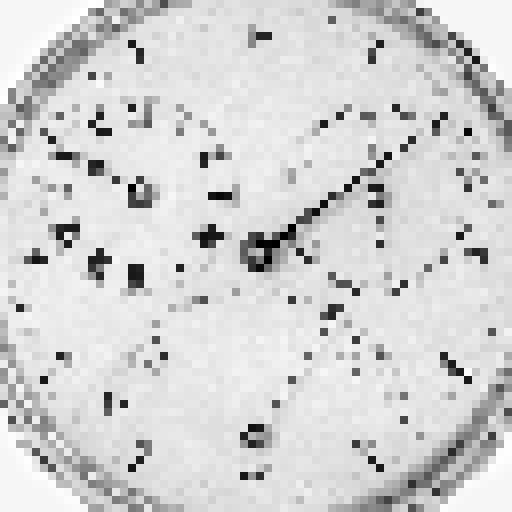

In [25]:
N=512
I1 = I0.resize((N,N),resample=Image.NEAREST)
I1

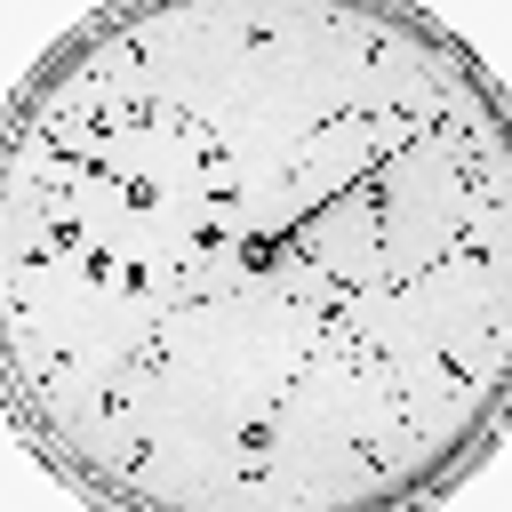

In [26]:
N=512
I2 = I0.resize((N,N),resample=Image.BICUBIC)
I2

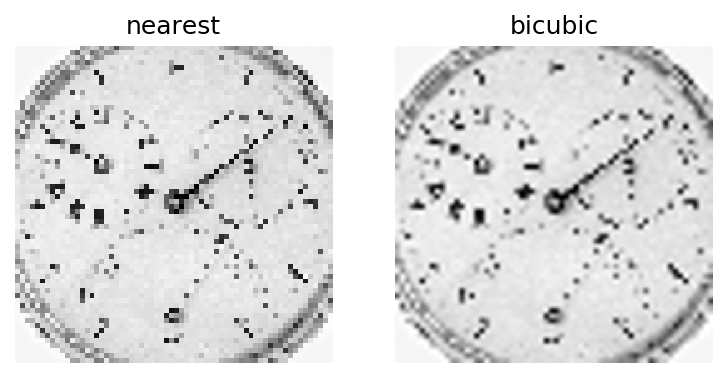

In [27]:
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('nearest')
plt.subplot(1,2,2)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('bicubic')
plt.show()

### Image Addition (Averaging)

(566, 598)


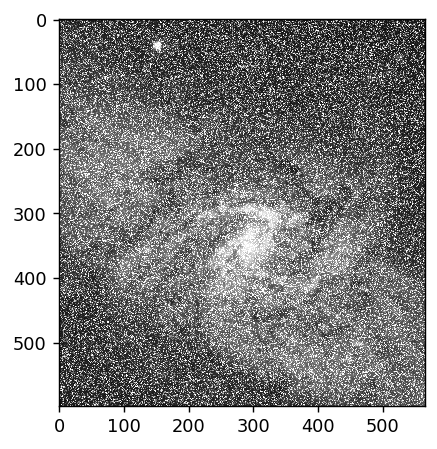

In [28]:
I = Image.open(path0+'noisygalaxy/galaxy001.tif')
print(I.size)
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()

In [29]:
flist = os.listdir(path0+'noisygalaxy')
flist[3:8]

['galaxy047.tif',
 'galaxy051.tif',
 'galaxy045.tif',
 'galaxy044.tif',
 'galaxy050.tif']

In [30]:
len(flist)

64

In [31]:
Ik = np.zeros((len(flist),I.size[1],I.size[0]))
for n in range(0,len(flist)):
  if flist[n].endswith('tif'):
    Ik[n] = Image.open(path0+'noisygalaxy/'+flist[n])

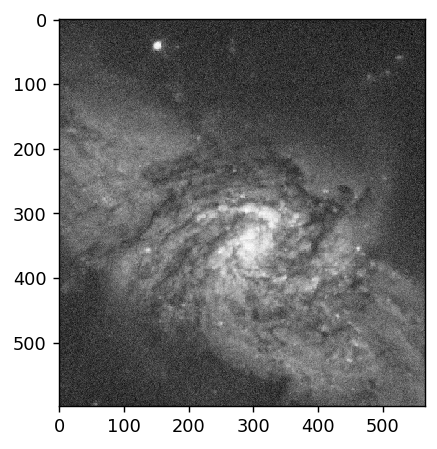

In [32]:
plt.figure(dpi=128)
N = len(flist)
plt.imshow(np.mean(Ik[:N],axis=0),cmap='gray')
plt.show()

### Image Subtraction

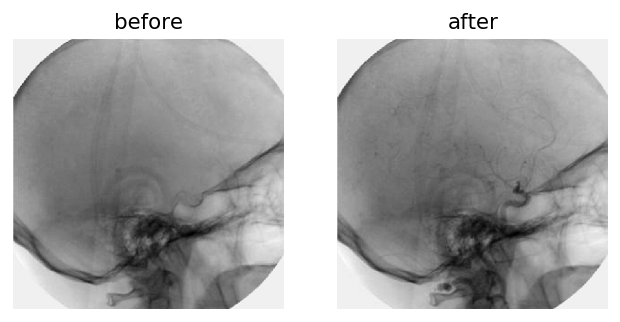

In [33]:
I1 = Image.open(path0+'angiography-mask-image.tif')
I2 = Image.open(path0+'angiography-live-image.tif')

plt.figure(dpi=128)
plt.subplot(1,2,1)
plt.imshow(I1,cmap='gray')
plt.axis('off')
plt.title('before')
plt.subplot(1,2,2)
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.title('after')
plt.show()

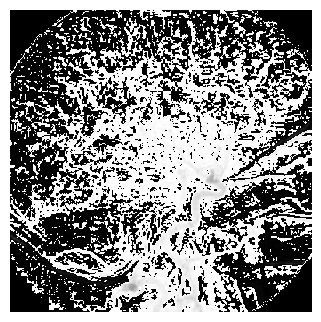

In [34]:
I_diff_uint = Image.fromarray(np.asarray(I2) - np.asarray(I1))
plt.figure(dpi=100)
plt.imshow(I_diff_uint,cmap='gray')
plt.axis('off')
plt.show()

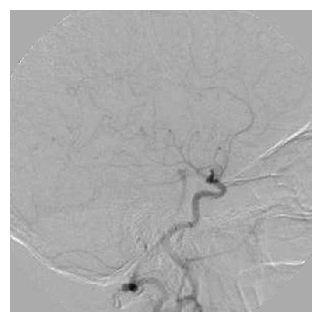

In [35]:
I_diff_int = np.asarray(I2).astype(int) - np.asarray(I1).astype(int)
plt.figure(dpi=100)
plt.imshow(I_diff_int,cmap='gray')
plt.axis('off')
plt.show()